<a href="https://colab.research.google.com/github/wei-enwang/space-ham/blob/main/main_driver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import nltk
from nltk.corpus import words
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils import data
from preprocess import BalancedData

import models
import utils

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/weinwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
nltk.download('words')

device = "cuda" if torch.cuda.is_available() else "cpu"
assert device == "cuda"   # use gpu whenever you can!

seed = 32
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

[nltk_data] Downloading package words to /home/weinwang/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [3]:
plot_yes = True

# use one dataset for now
train_data_dir = "./data/enron1/"
test_data_dir = "./data/enron2/"
output_dir = "./output/"

# hyperparameters
batch_size = 64
hidden_size = 64
dropout = 0.5
learning_rate = 5e-5
epochs = 60
max_len = 200

In [4]:
vocab = set([str.lower() for str in words.words()])

# train_dataset = WholeData(train_data_dir, src_vocab=vocab, use_max_len=True, max_len=max_len)
# test_dataset = WholeData(test_data_dir, src_vocab=vocab, use_max_len=True, max_len=max_len)
# Balanced dataset
train_dataset = BalancedData(train_data_dir, src_vocab=vocab, use_max_len=True, max_len=max_len)
test_dataset = BalancedData(test_data_dir, src_vocab=vocab, use_max_len=True, max_len=max_len)

# embed = utils.load_pretrained_vectors(w2idx, "fastText/crawl-300d-2M.vec")
# embed = torch.tensor(embed)

Number of ham emails: 1500, spam emails: 1500
Number of ham emails: 1496, spam emails: 1496


In [5]:
train_dataloader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, 
                                   num_workers=8, pin_memory=True)
test_dataloader = data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True,
                                  num_workers=8, pin_memory=True, drop_last=True)


In [6]:
model = models.spam_lstm(hidden_size=hidden_size, vocab_size=len(vocab), dropout=dropout).to(device)
loss_fn = nn.BCEWithLogitsLoss().to(device)
opt = Adam(model.parameters(), lr=learning_rate)

  2%|▏         | 1/60 [00:03<03:50,  3.90s/it]

Epoch 0
-------------------------------
Training loss: 0.693650, avg accuracy: 0.499858
Testing loss: 0.693457, avg accuracy: 0.500000


  3%|▎         | 2/60 [00:07<03:44,  3.87s/it]

Epoch 1
-------------------------------
Training loss: 0.693449, avg accuracy: 0.500095
Testing loss: 0.693373, avg accuracy: 0.500340


  5%|▌         | 3/60 [00:11<03:41,  3.88s/it]

Epoch 2
-------------------------------
Training loss: 0.693420, avg accuracy: 0.500190
Testing loss: 0.693257, avg accuracy: 0.499660


  7%|▋         | 4/60 [00:15<03:37,  3.88s/it]

Epoch 3
-------------------------------
Training loss: 0.693281, avg accuracy: 0.499858
Testing loss: 0.693248, avg accuracy: 0.499660


  8%|▊         | 5/60 [00:19<03:32,  3.87s/it]

Epoch 4
-------------------------------
Training loss: 0.693156, avg accuracy: 0.500095
Testing loss: 0.693263, avg accuracy: 0.502378


 10%|█         | 6/60 [00:23<03:28,  3.85s/it]

Epoch 5
-------------------------------
Training loss: 0.693190, avg accuracy: 0.499715
Testing loss: 0.693275, avg accuracy: 0.502378


 12%|█▏        | 7/60 [00:27<03:23,  3.84s/it]

Epoch 6
-------------------------------
Training loss: 0.693108, avg accuracy: 0.499953
Testing loss: 0.693248, avg accuracy: 0.502717


 13%|█▎        | 8/60 [00:30<03:20,  3.85s/it]

Epoch 7
-------------------------------
Training loss: 0.692965, avg accuracy: 0.499905
Testing loss: 0.693224, avg accuracy: 0.500679


 15%|█▌        | 9/60 [00:34<03:16,  3.84s/it]

Epoch 8
-------------------------------
Training loss: 0.692962, avg accuracy: 0.499905
Testing loss: 0.693254, avg accuracy: 0.501698


 17%|█▋        | 10/60 [00:38<03:11,  3.84s/it]

Epoch 9
-------------------------------
Training loss: 0.692831, avg accuracy: 0.499905
Testing loss: 0.693276, avg accuracy: 0.499660


 18%|█▊        | 11/60 [00:42<03:08,  3.85s/it]

Epoch 10
-------------------------------
Training loss: 0.692861, avg accuracy: 0.500000
Testing loss: 0.693324, avg accuracy: 0.500000


 20%|██        | 12/60 [00:46<03:04,  3.84s/it]

Epoch 11
-------------------------------
Training loss: 0.692713, avg accuracy: 0.499810
Testing loss: 0.693415, avg accuracy: 0.500340


 22%|██▏       | 13/60 [00:50<03:00,  3.84s/it]

Epoch 12
-------------------------------
Training loss: 0.692419, avg accuracy: 0.500142
Testing loss: 0.693576, avg accuracy: 0.501698


 23%|██▎       | 14/60 [00:53<02:56,  3.84s/it]

Epoch 13
-------------------------------
Training loss: 0.691922, avg accuracy: 0.500095
Testing loss: 0.693960, avg accuracy: 0.500340


 25%|██▌       | 15/60 [00:57<02:53,  3.85s/it]

Epoch 14
-------------------------------
Training loss: 0.690976, avg accuracy: 0.499953
Testing loss: 0.695223, avg accuracy: 0.499660


 27%|██▋       | 16/60 [01:01<02:49,  3.85s/it]

Epoch 15
-------------------------------
Training loss: 0.685221, avg accuracy: 0.500332
Testing loss: 0.709079, avg accuracy: 0.499321


 28%|██▊       | 17/60 [01:05<02:45,  3.85s/it]

Epoch 16
-------------------------------
Training loss: 0.670070, avg accuracy: 0.500475
Testing loss: 0.715840, avg accuracy: 0.501359


 30%|███       | 18/60 [01:09<02:41,  3.85s/it]

Epoch 17
-------------------------------
Training loss: 0.649824, avg accuracy: 0.500047
Testing loss: 0.725646, avg accuracy: 0.500000


 32%|███▏      | 19/60 [01:13<02:37,  3.84s/it]

Epoch 18
-------------------------------
Training loss: 0.638919, avg accuracy: 0.500095
Testing loss: 0.698024, avg accuracy: 0.500000


 33%|███▎      | 20/60 [01:17<02:34,  3.86s/it]

Epoch 19
-------------------------------
Training loss: 0.634004, avg accuracy: 0.500142
Testing loss: 0.734830, avg accuracy: 0.497622


 35%|███▌      | 21/60 [01:20<02:29,  3.84s/it]

Epoch 20
-------------------------------
Training loss: 0.625659, avg accuracy: 0.499620
Testing loss: 0.742342, avg accuracy: 0.500679


 37%|███▋      | 22/60 [01:24<02:26,  3.85s/it]

Epoch 21
-------------------------------
Training loss: 0.625072, avg accuracy: 0.500142
Testing loss: 0.764335, avg accuracy: 0.498302


 38%|███▊      | 23/60 [01:28<02:22,  3.85s/it]

Epoch 22
-------------------------------
Training loss: 0.611249, avg accuracy: 0.500142
Testing loss: 0.874023, avg accuracy: 0.501359


 40%|████      | 24/60 [01:32<02:18,  3.86s/it]

Epoch 23
-------------------------------
Training loss: 0.628726, avg accuracy: 0.500000
Testing loss: 0.707216, avg accuracy: 0.499321


 42%|████▏     | 25/60 [01:36<02:15,  3.86s/it]

Epoch 24
-------------------------------
Training loss: 0.624518, avg accuracy: 0.499715
Testing loss: 0.755668, avg accuracy: 0.501698


 43%|████▎     | 26/60 [01:40<02:11,  3.86s/it]

Epoch 25
-------------------------------
Training loss: 0.614281, avg accuracy: 0.499668
Testing loss: 0.779264, avg accuracy: 0.500679


 45%|████▌     | 27/60 [01:44<02:07,  3.86s/it]

Epoch 26
-------------------------------
Training loss: 0.608248, avg accuracy: 0.502755
Testing loss: 0.939939, avg accuracy: 0.500340


 47%|████▋     | 28/60 [01:47<02:02,  3.83s/it]

Epoch 27
-------------------------------
Training loss: 0.564789, avg accuracy: 0.538659
Testing loss: 1.421900, avg accuracy: 0.519701


 48%|████▊     | 29/60 [01:51<01:57,  3.80s/it]

Epoch 28
-------------------------------
Training loss: 0.545317, avg accuracy: 0.640530
Testing loss: 0.922583, avg accuracy: 0.627038


 50%|█████     | 30/60 [01:55<01:54,  3.83s/it]

Epoch 29
-------------------------------
Training loss: 0.511484, avg accuracy: 0.790131
Testing loss: 0.800793, avg accuracy: 0.643003


 52%|█████▏    | 31/60 [01:59<01:50,  3.83s/it]

Epoch 30
-------------------------------
Training loss: 0.475967, avg accuracy: 0.802907
Testing loss: 0.756700, avg accuracy: 0.657269


 53%|█████▎    | 32/60 [02:02<01:45,  3.78s/it]

Epoch 31
-------------------------------
Training loss: 0.472725, avg accuracy: 0.798632
Testing loss: 0.714429, avg accuracy: 0.673913


 55%|█████▌    | 33/60 [02:06<01:43,  3.82s/it]

Epoch 32
-------------------------------
Training loss: 0.476267, avg accuracy: 0.787994
Testing loss: 0.712633, avg accuracy: 0.677310


 57%|█████▋    | 34/60 [02:10<01:39,  3.84s/it]

Epoch 33
-------------------------------
Training loss: 0.549700, avg accuracy: 0.714286
Testing loss: 0.720676, avg accuracy: 0.564878


 58%|█████▊    | 35/60 [02:14<01:36,  3.86s/it]

Epoch 34
-------------------------------
Training loss: 0.540934, avg accuracy: 0.670118
Testing loss: 0.694380, avg accuracy: 0.666101


 60%|██████    | 36/60 [02:18<01:32,  3.85s/it]

Epoch 35
-------------------------------
Training loss: 0.466887, avg accuracy: 0.736702
Testing loss: 0.738657, avg accuracy: 0.683424


 62%|██████▏   | 37/60 [02:22<01:28,  3.86s/it]

Epoch 36
-------------------------------
Training loss: 0.451142, avg accuracy: 0.794785
Testing loss: 0.799661, avg accuracy: 0.676291


 63%|██████▎   | 38/60 [02:26<01:24,  3.85s/it]

Epoch 37
-------------------------------
Training loss: 0.439264, avg accuracy: 0.816869
Testing loss: 0.742851, avg accuracy: 0.684443


 65%|██████▌   | 39/60 [02:30<01:20,  3.86s/it]

Epoch 38
-------------------------------
Training loss: 0.441265, avg accuracy: 0.810838
Testing loss: 0.740133, avg accuracy: 0.683764


 67%|██████▋   | 40/60 [02:33<01:16,  3.85s/it]

Epoch 39
-------------------------------
Training loss: 0.441467, avg accuracy: 0.808891
Testing loss: 0.724081, avg accuracy: 0.688859


 68%|██████▊   | 41/60 [02:37<01:13,  3.85s/it]

Epoch 40
-------------------------------
Training loss: 0.440156, avg accuracy: 0.807323
Testing loss: 0.715242, avg accuracy: 0.690557


 70%|███████   | 42/60 [02:41<01:09,  3.85s/it]

Epoch 41
-------------------------------
Training loss: 0.453218, avg accuracy: 0.792933
Testing loss: 0.700489, avg accuracy: 0.687840


 72%|███████▏  | 43/60 [02:45<01:05,  3.86s/it]

Epoch 42
-------------------------------
Training loss: 0.435757, avg accuracy: 0.810125
Testing loss: 0.789025, avg accuracy: 0.686821


 73%|███████▎  | 44/60 [02:49<01:01,  3.87s/it]

Epoch 43
-------------------------------
Training loss: 0.424300, avg accuracy: 0.822046
Testing loss: 0.768399, avg accuracy: 0.686821


 75%|███████▌  | 45/60 [02:53<00:58,  3.87s/it]

Epoch 44
-------------------------------
Training loss: 0.424700, avg accuracy: 0.821619
Testing loss: 0.723677, avg accuracy: 0.693274


 77%|███████▋  | 46/60 [02:57<00:54,  3.86s/it]

Epoch 45
-------------------------------
Training loss: 0.537676, avg accuracy: 0.725779
Testing loss: 0.697508, avg accuracy: 0.670856


 78%|███████▊  | 47/60 [03:00<00:50,  3.86s/it]

Epoch 46
-------------------------------
Training loss: 0.485546, avg accuracy: 0.757836
Testing loss: 0.712432, avg accuracy: 0.669158


 80%|████████  | 48/60 [03:04<00:46,  3.85s/it]

Epoch 47
-------------------------------
Training loss: 0.478527, avg accuracy: 0.762396
Testing loss: 0.712573, avg accuracy: 0.672554


 82%|████████▏ | 49/60 [03:08<00:42,  3.86s/it]

Epoch 48
-------------------------------
Training loss: 0.475673, avg accuracy: 0.765720
Testing loss: 0.715919, avg accuracy: 0.673234


 83%|████████▎ | 50/60 [03:12<00:38,  3.86s/it]

Epoch 49
-------------------------------
Training loss: 0.472016, avg accuracy: 0.767287
Testing loss: 0.718776, avg accuracy: 0.672894


 85%|████████▌ | 51/60 [03:16<00:34,  3.85s/it]

Epoch 50
-------------------------------
Training loss: 0.463319, avg accuracy: 0.773604
Testing loss: 0.725931, avg accuracy: 0.672215


 87%|████████▋ | 52/60 [03:20<00:30,  3.85s/it]

Epoch 51
-------------------------------
Training loss: 0.463655, avg accuracy: 0.772464
Testing loss: 0.729577, avg accuracy: 0.672894


 88%|████████▊ | 53/60 [03:24<00:27,  3.86s/it]

Epoch 52
-------------------------------
Training loss: 0.461245, avg accuracy: 0.775266
Testing loss: 0.725493, avg accuracy: 0.676970


 90%|█████████ | 54/60 [03:27<00:23,  3.86s/it]

Epoch 53
-------------------------------
Training loss: 0.451738, avg accuracy: 0.778543
Testing loss: 0.728576, avg accuracy: 0.677310


 92%|█████████▏| 55/60 [03:31<00:19,  3.87s/it]

Epoch 54
-------------------------------
Training loss: 0.445605, avg accuracy: 0.783102
Testing loss: 0.741843, avg accuracy: 0.676291


 93%|█████████▎| 56/60 [03:35<00:15,  3.88s/it]

Epoch 55
-------------------------------
Training loss: 0.433753, avg accuracy: 0.785097
Testing loss: 0.755737, avg accuracy: 0.677989


 95%|█████████▌| 57/60 [03:39<00:11,  3.88s/it]

Epoch 56
-------------------------------
Training loss: 0.425007, avg accuracy: 0.797302
Testing loss: 0.752307, avg accuracy: 0.680367


 97%|█████████▋| 58/60 [03:43<00:07,  3.88s/it]

Epoch 57
-------------------------------
Training loss: 0.424886, avg accuracy: 0.797587
Testing loss: 0.738197, avg accuracy: 0.685462


 98%|█████████▊| 59/60 [03:47<00:03,  3.87s/it]

Epoch 58
-------------------------------
Training loss: 0.413346, avg accuracy: 0.743351
Testing loss: 0.712763, avg accuracy: 0.723845


100%|██████████| 60/60 [03:51<00:00,  3.85s/it]

Epoch 59
-------------------------------
Training loss: 0.437979, avg accuracy: 0.761018
Testing loss: 0.769024, avg accuracy: 0.684443


Final testing loss: 0.767430, testing accuracy: 0.685802
F1 score: 0.700162 Precision: 0.669145, Recall: 0.734194


(0.43797872358180107, 0.7674301603566045)

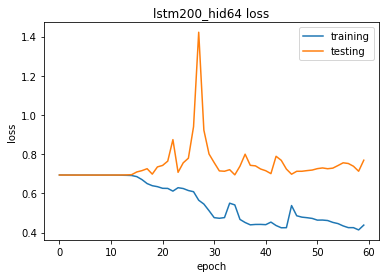

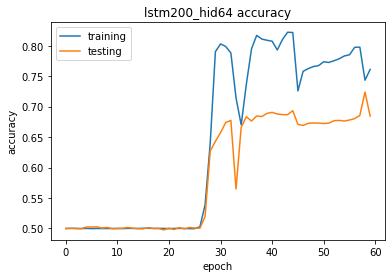

In [7]:
utils.train_test_scheme(train_dataloader, test_dataloader, model, loss_fn, opt, 
                        task_name="lstm200_hid64", epochs=epochs, 
                        vis=plot_yes, print_every=1, img_dir=output_dir)



In [8]:
torch.save(model.state_dict(), output_dir+"lstmlen200_hid64.pt")